<a href="https://colab.research.google.com/github/jjuncs/Tensorflow/blob/main/NLP_text_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8장. 텐서플로로 텍스트 생성하기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/aiml4coders/blob/main/ch08/08-text-generation.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch08/08-text-generation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시퀀스를 입력 시퀀스로 변환하기

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

## 데이터셋 확장

In [17]:
#!wget https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt

In [2]:
#!wget http://jjun.com/AI/NLP.html

--2023-10-24 14:18:19--  http://jjun.com/AI/NLP.html
Resolving jjun.com (jjun.com)... 222.122.86.166
Connecting to jjun.com (jjun.com)|222.122.86.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1583 (1.5K) [text/html]
Saving to: ‘NLP.html’

NLP.html            100%[===================>]   1.55K  --.-KB/s    in 0s      

2023-10-24 14:18:19 (244 MB/s) - ‘NLP.html’ saved [1583/1583]



In [6]:
#data = open('irish-lyrics-eof.txt').read()
data = open('NLP.txt').read()
corpus = data.lower().split("\n")


In [7]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'것': 1, '내': 2, '더': 3, '내가': 4, '수': 5, '난': 6, '좋은': 7, '나은': 8, '한': 9, '나를': 10, '마': 11, '뿐': 12, '최고': 13, '나도': 14, '그냥': 15, '흔들': 16, '말': 17, '한다': 18, '건': 19, '달콤한': 20, '못': 21, '충성을': 22, '다해보자': 23, '당신의': 24, '한마디': 25, '걸': 26, '\u2003': 27, '말이': 28, '맞았다고': 29, '있어': 30, '쉽게': 31, '없다': 32, '알': 33, '이해': 34, '인생': 35, '그': 36, '함께': 37, '읽기전용': 38, '기억장치': 39, '니가': 40, '좀': 41, '알자': 42, '자유로': 43, '와요': 44, '버렸어': 45, '싶어': 46, '나는': 47, '나나나': 48, '동전을': 49, '받았으니까': 50, '모든': 51, '이': 52, '몸을': 53, '이야기': 54, '사람': 55, '니': 56, '더더더': 57, '때': 58, '않는': 59, '꿈을': 60, '머리의': 61, '저장': 62, '방식': 63, '왜': 64, '없는': 65, '저': 66, '기억의': 67, '번에': 68, '멈출': 69, '너를': 70, '하지만': 71, '기분': 72, '여기선': 73, '집에': 74, '꺼내': 75, '거야': 76, '무심코': 77, '뱉은': 78, '무슨': 79, '수를': 80, '써내서라도': 81, '해내자': 82, '눈덩이처럼': 83, '커지는': 84, '걸어서': 85, '믿고': 86, '싶지': 87, '다른': 88, '머릿속': 89, '절대': 90, '없었어': 91, '시대가': 92, '원해왔던': 93, '원활한': 94, '의사소통능력': 95, '혼잣말하며': 96, '걷고': 97, '진실이':

In [8]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                           maxlen=max_sequence_len, padding='pre'))

In [10]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 92ms/step - loss: 6.4420 - accuracy: 0.0200
Epoch 2/100
24/24 [==============================] - 1s 56ms/step - loss: 6.4286 - accuracy: 0.0333
Epoch 3/100
24/24 [==============================] - 1s 45ms/step - loss: 6.4053 - accuracy: 0.0333
Epoch 4/100
24/24 [==============================] - 1s 26ms/step - loss: 6.3298 - accuracy: 0.0333
Epoch 5/100
24/24 [==============================] - 1s 44ms/step - loss: 6.1712 - accuracy: 0.0333
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 6.0412 - accuracy: 0.0333
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 5.9786 - accuracy: 0.0333
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 5.9442 - accuracy: 0.0333
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 5.9235 - accuracy: 0.0333
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 5.9050 - accuracy: 0.0333

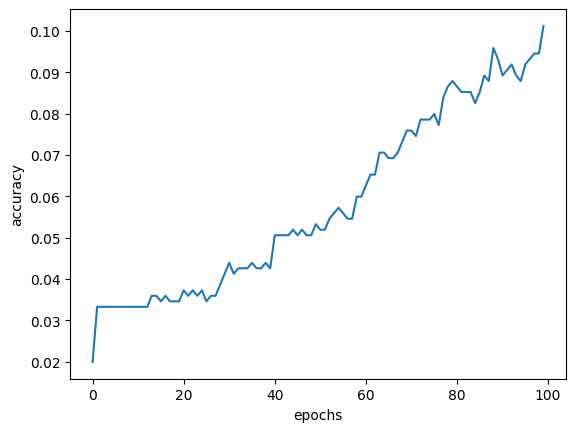

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [14]:
#seed_text = "in the town of athy"
seed_text = "갈릴레오"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list],
                           maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
tokenizer.index_word[predicted[0]]

1/1 [==============================] - 1s 1s/step


'막'

In [15]:
#seed_text = "sweet jeremy saw dublin"
seed_text = "생각난다"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 18ms/step
생각난다 막 의사소통능력 의사소통능력 드는 수 맡겨 끝 끝 있다면 있다면


## 모델 구조 바꾸기

In [16]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 51ms/step - loss: 6.4422 - accuracy: 0.0186
Epoch 2/100
24/24 [==============================] - 1s 39ms/step - loss: 6.4293 - accuracy: 0.0333
Epoch 3/100
24/24 [==============================] - 1s 37ms/step - loss: 6.3981 - accuracy: 0.0333
Epoch 4/100
24/24 [==============================] - 1s 43ms/step - loss: 6.2689 - accuracy: 0.0333
Epoch 5/100
24/24 [==============================] - 0s 17ms/step - loss: 6.1014 - accuracy: 0.0333
Epoch 6/100
24/24 [==============================] - 0s 18ms/step - loss: 6.0099 - accuracy: 0.0333
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 5.9683 - accuracy: 0.0333
Epoch 8/100
24/24 [==============================] - 0s 21ms/step - loss: 5.9453 - accuracy: 0.0333
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 5.9333 - accuracy: 0.0333
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 5.9256 - accuracy: 0.0333


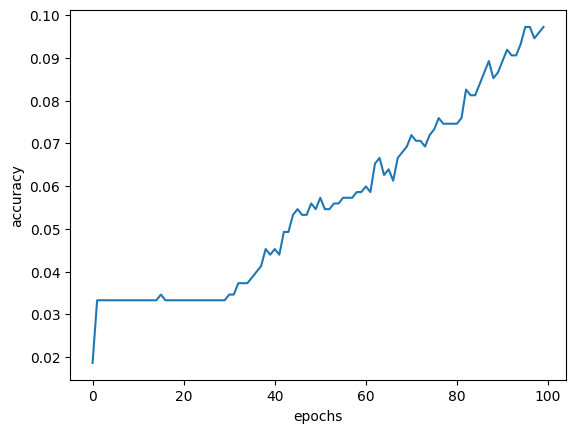

In [18]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [20]:
#seed_text = "in the town of athy"
seed_text = "갈릴레오"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list],
                           maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
tokenizer.index_word[predicted[0]]

1/1 [==============================] - 0s 21ms/step


'말이'

In [21]:
#seed_text = "sweet jeremy saw dublin"
seed_text="갈릴레오"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 20ms/step
갈릴레오 말이 것 것 것 것 것 것 것 것 것


## 데이터 개선하기

In [22]:
window_size = 10
sentences = []
alltext = []
#data = open('irish-lyrics-eof.txt').read()
data = open('NLP.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [24]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(window_size-1, return_sequences='True')))
model.add(Bidirectional(LSTM(window_size-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 60ms/step - loss: 6.4418 - accuracy: 0.0213
Epoch 2/100
24/24 [==============================] - 1s 35ms/step - loss: 6.4257 - accuracy: 0.0333
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 6.3678 - accuracy: 0.0333
Epoch 4/100
24/24 [==============================] - 0s 17ms/step - loss: 6.1838 - accuracy: 0.0333
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 6.0345 - accuracy: 0.0333
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 5.9681 - accuracy: 0.0333
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 5.9429 - accuracy: 0.0333
Epoch 8/100
24/24 [==============================] - 1s 21ms/step - loss: 5.9274 - accuracy: 0.0333
Epoch 9/100
24/24 [==============================] - 1s 27ms/step - loss: 5.9178 - accuracy: 0.0333
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 5.9057 - accuracy: 0.0333

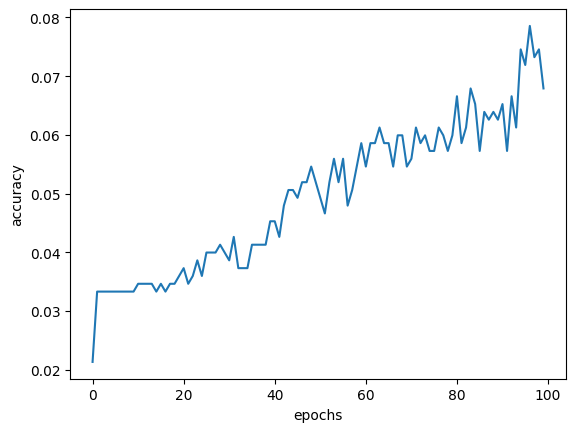

In [25]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [26]:
#seed_text = "sweet jeremy saw dublin"
seed_text ="갈릴레오"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 19ms/step
갈릴레오 않는 나를 걸어서 가르치려 않는 내가 소중한 내가 고민만이 흘러


하이퍼파라미터 변경

In [27]:
window_size = 6
sentences = []
alltext = []
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [28]:
model = Sequential()
model.add(Embedding(total_words, 16))
model.add(Bidirectional(LSTM(32, return_sequences='True')))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 9s 116ms/step - loss: 6.3717 - accuracy: 0.0266
Epoch 2/100
24/24 [==============================] - 2s 76ms/step - loss: 5.9439 - accuracy: 0.0133
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 5.6259 - accuracy: 0.0293
Epoch 4/100
24/24 [==============================] - 1s 36ms/step - loss: 5.4004 - accuracy: 0.0466
Epoch 5/100
24/24 [==============================] - 1s 61ms/step - loss: 5.2161 - accuracy: 0.0413
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 4.9647 - accuracy: 0.0599
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 4.6212 - accuracy: 0.0799
Epoch 8/100
24/24 [==============================] - 0s 9ms/step - loss: 4.3414 - accuracy: 0.0919
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 3.9506 - accuracy: 0.1438
Epoch 10/100
24/24 [==============================] - 0s 15ms/step - loss: 3.5808 - accuracy: 0.1731


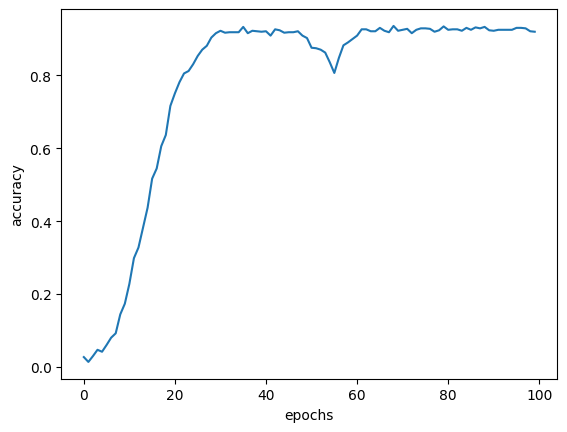

In [29]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [30]:
#seed_text = "sweet jeremy saw dublin"
seed_text = "갈릴레오"
next_words=10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 18ms/step
갈릴레오 떨지도 말 것 더 강한 것 더 강한 것 더
